In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
import scipy.optimize as opt
import displayData as dd
import nncostfunction as ncf
import sigmoidgradient as sg
import randInitializeWeights as rinit
import checkNNGradients as cng
import predict as pd

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 input images of Digits
hidden_layer_size = 25  # 25 hidden layers
num_labels = 10         # 10 labels, from 0 to 9
                        # Note that we have mapped "0" to label 10

In [3]:
# ===================== Part 1: Loading and Visualizing Data =====================
# We start the exercise by first loading and visualizing the dataset.
# You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
data = scio.loadmat('ex4data1.mat')
X = data['X']
y = data['y'].flatten()
m = y.size

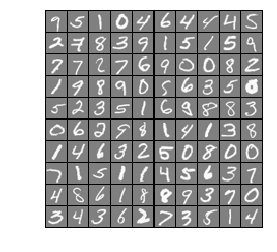

In [4]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(range(m))
selected = X[rand_indices[0:100], :]

dd.display_data(selected)

In [5]:
# ===================== Part 2: Loading Parameters =====================
# In this part of the exercise, we load some pre-initiated
# neural network parameters

print('Loading Saved Neural Network Parameters ...')

data = scio.loadmat('ex4weights.mat')
theta1 = data['Theta1']
theta2 = data['Theta2']

nn_params = np.concatenate([theta1.flatten(), theta2.flatten()])

Loading Saved Neural Network Parameters ...


In [6]:

# ===================== Part 3: Compute Cost (Feedforward) =====================
# To the neural network, you should first start by implementing the
# feedforward part of the neural network that returns the cost only. You
# should complete the code in nncostfunction.py to return cost. After
# implementing the feedforward to compute the cost, you can verify that
# your implementation is correct by verifying that you get the same cost
# as us for the fixed debugging parameters.
#
# We suggest implementing the feedforward cost *without* regularization
# first so that it will be easier for you to debug. Later, in part 4, you
# will get to implement the regularized cost.
#

print('Feedforward Using Neural Network ...')

Feedforward Using Neural Network ...


In [7]:
import numpy as np
from sigmoid import *

def out(theta1, theta2, x):
    m = x.shape[0]
    h1 = np.c_[np.ones(m), x] @ theta1.T
    z1 = sigmoid(h1)
    h2 = np.c_[np.ones(m), z1] @ theta2.T
    z2 = sigmoid(h2)
    return z2

def one_hot(y):
    values = y - 1
    n_values = np.max(values) + 1
    return np.eye(n_values)[values]

def sigmoid_gradient(z):
    g = np.zeros(z.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the gradient of the sigmoid function evaluated at
    #                each value of z (z can be a matrix, vector or scalar)
    #
    g = sigmoid(z)* (1 - sigmoid(z))
    # ===========================================================

    return g


def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmd):
    # Reshape nn_params back into the parameters theta1 and theta2, the weight 2-D arrays
    # for our two layer neural network
    theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
    theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape(num_labels, hidden_layer_size + 1)

    # Useful value
    m = y.size

    # You need to return the following variables correctly
    cost = 0
    theta1_grad = np.zeros(theta1.shape)  # 25 x 401
    theta2_grad = np.zeros(theta2.shape)  # 10 x 26

    # ===================== Your Code Here =====================
    # Instructions : You should complete the code by working thru the
    #                following parts
    #
    # Part 1 : Feedforward the neural network and return the cost in the
    #          variable cost. After implementing Part 1, you can verify that your
    #          cost function computation is correct by running ex4.py
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #         theta1_grad and theta2_grad. You should return the partial derivatives of
    #         the cost function with respect to theta1 and theta2 in theta1_grad and
    #         theta2_grad, respectively. After implementing Part 2, you can check
    #         that your implementation is correct by running checkNNGradients
    #
    #         Note: The vector y passed into the function is a vector of labels
    #               containing values from 1..K. You need to map this vector into a 
    #               binary vector of 1's and 0's to be used with the neural network
    #               cost function.
    #
    #         Hint: We recommend implementing backpropagation using a for-loop
    #               over the training examples if you are implementing it for the 
    #               first time.
    #
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to theta1_grad
    #               and theta2_grad from Part 2.
    #
    features = np.c_[np.ones(m), X]
    y_matrix = y2 = one_hot(y)
    
    a1 = features # 5000x401
    z2 = theta1.dot(a1.T) # 25x401 * 401x5000 = 25x5000 
    a2 = np.c_[np.ones(m),sigmoid(z2.T)] # 5000x26 

    z3 = theta2.dot(a2.T) # 10x26 * 26x5000 = 10x5000 
    a3 = sigmoid(z3) # 10x5000

    cost = -1*(1/m)*np.sum((np.log(a3.T)*(y_matrix)+np.log(1-a3).T*(1-y_matrix))) + \
        (lmd/(2*m))*(np.sum(np.square(theta1[:,1:])) + np.sum(np.square(theta2[:,1:])))

    # Gradients
    d3 = a3.T - y_matrix # 5000x10
    d2 = theta2[:,1:].T.dot(d3.T)*sigmoid_gradient(z2) # 25x10 *10x5000 * 25x5000 = 25x5000

    delta1 = d2.dot(a1) # 25x5000 * 5000x401 = 25x401
    delta2 = d3.T.dot(a2) # 10x5000 *5000x26 = 10x26

    theta1_ = np.c_[np.zeros((theta1.shape[0],1)),theta1[:,1:]]
    theta2_ = np.c_[np.zeros((theta2.shape[0],1)),theta2[:,1:]]

    theta1_grad = delta1/m + (theta1_*lmd)/m
    theta2_grad = delta2/m + (theta2_*lmd)/m

    
    # ====================================================================================
    # Unroll gradients
    grad = np.concatenate([theta1_grad.flatten(), theta2_grad.flatten()])

    return cost, grad


In [8]:
# Weight regularization parameter (we set this to 0 here).
lmd = 0

# cost, grad = ncf.nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)
cost, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)

print('Cost at parameters (loaded from ex4weights): {:0.6f}\n(This value should be about 0.287629)'.format(cost))


Cost at parameters (loaded from ex4weights): 0.287629
(This value should be about 0.287629)


In [9]:
# ===================== Part 4: Implement Regularization =====================
# Once your cost function implementation is correct, you should now
# continue to implement the regularization with the cost.
#

print('Checking Cost Function (w/ Regularization) ...')

# Weight regularization parameter (we set this to 1 here).
lmd = 1

cost, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)

print('Cost at parameters (loaded from ex4weights): {:0.6f}\n(This value should be about 0.383770)'.format(cost))

Checking Cost Function (w/ Regularization) ...
Cost at parameters (loaded from ex4weights): 0.383770
(This value should be about 0.383770)


In [10]:
# ===================== Part 5: Sigmoid Gradient =====================
# Before you start implementing the neural network, you will first
# implement the gradient for the sigmoid function. You should complete the
# code in the sigmoidGradient.py file
#

print('Evaluating sigmoid gradient ...')

# g = sg.sigmoid_gradient(np.array([-1, -0.5, 0, 0.5, 1]))
g = sigmoid_gradient(np.array([-1, -0.5, 0, 0.5, 1]))

print('Sigmoid gradient evaluated at [-1  -0.5  0  0.5  1]:\n{}'.format(g))


Evaluating sigmoid gradient ...
Sigmoid gradient evaluated at [-1  -0.5  0  0.5  1]:
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [11]:
import numpy as np


def rand_initialization(l_in, l_out, epsilon_init = 0.12):
    # You need to return the following variable correctly
    w = np.zeros((l_out, 1 + l_in))

    # ===================== Your Code Here =====================
    # Instructions : Initialize w randomly so that we break the symmetry while
    #                training the neural network
    #
    # Note : The first column of w corresponds to the parameters for the bias unit
    #

    
    w = np.random.rand(l_out, 1 + l_in) * 2 * epsilon_init - epsilon_init

    # ===========================================================

    return w


In [12]:
# ===================== Part 6: Initializing Parameters =====================
# In this part of the exercise, you will be starting to implement a two
# layer neural network that classifies digits. You will start by
# implementing a function to initialize the weights of the neural network
# (randInitializeWeights.m)

print('Initializing Neural Network Parameters ...')

# initial_theta1 = rinit.rand_initialization(input_layer_size, hidden_layer_size)
# initial_theta2 = rinit.rand_initialization(hidden_layer_size, num_labels)
initial_theta1 = rand_initialization(input_layer_size, hidden_layer_size)
initial_theta2 = rand_initialization(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_theta1.flatten(), initial_theta2.flatten()])

Initializing Neural Network Parameters ...


In [13]:
import numpy as np
import debugInitializeWeights as diw
import computeNumericalGradient as cng


def check_nn_gradients(lmd):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5

    # We generatesome 'random' test data
    theta1 = diw.debug_initialize_weights(hidden_layer_size, input_layer_size)
    theta2 = diw.debug_initialize_weights(num_labels, hidden_layer_size)

    # Reusing debugInitializeWeights to genete X
    X = diw.debug_initialize_weights(m, input_layer_size - 1)
    y = 1 + np.mod(np.arange(1, m + 1), num_labels)

    # Unroll parameters
    nn_params = np.concatenate([theta1.flatten(), theta2.flatten()])

    def cost_func(p):
        return nn_cost_function(p, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)

    cost, grad = cost_func(nn_params)
    numgrad = cng.compute_numerial_gradient(cost_func, nn_params)

    print(np.c_[grad, numgrad])



In [14]:

# ===================== Part 7: Implement Backpropagation =====================
# Once your cost matches up with ours, you should proceed to implement the
# backpropagation algorithm for the neural network. You should add to the
# code you've written in nncostfunction.py to return the partial
# derivatives of the parameters.
#

print('Checking Backpropagation ... ')

# Check gradients by running check_nn_gradients()

lmd = 0
# cng.check_nn_gradients(lmd)
check_nn_gradients(lmd)

Checking Backpropagation ... 
[[ 9.01303866e-03  9.01303866e-03]
 [-6.08047127e-05 -6.08047124e-05]
 [-6.96665817e-06 -6.96665836e-06]
 [ 5.32765097e-05  5.32765121e-05]
 [ 1.17193332e-02  1.17193332e-02]
 [-7.05495376e-05 -7.05495373e-05]
 [ 1.66652194e-04  1.66652196e-04]
 [ 2.50634667e-04  2.50634669e-04]
 [ 3.66087511e-03  3.66087511e-03]
 [-1.54510225e-05 -1.54510182e-05]
 [ 1.86817175e-04  1.86817173e-04]
 [ 2.17326523e-04  2.17326523e-04]
 [-7.76550109e-03 -7.76550108e-03]
 [ 5.38947948e-05  5.38947931e-05]
 [ 3.53029178e-05  3.53029161e-05]
 [-1.57462990e-05 -1.57462976e-05]
 [-1.20637760e-02 -1.20637760e-02]
 [ 7.36351996e-05  7.36352002e-05]
 [-1.48712777e-04 -1.48712773e-04]
 [-2.34334912e-04 -2.34334914e-04]
 [ 3.02286353e-01  3.02286353e-01]
 [ 1.51010770e-01  1.51010770e-01]
 [ 1.45233242e-01  1.45233242e-01]
 [ 1.58998192e-01  1.58998192e-01]
 [ 1.46779086e-01  1.46779086e-01]
 [ 1.48987769e-01  1.48987769e-01]
 [ 9.95931723e-02  9.95931723e-02]
 [ 4.96122519e-02  4.9612

In [15]:
# ===================== Part 8: Implement Regularization =====================
# Once your backpropagation implementation is correct, you should now
# continue to implement the regularization with the cost and gradient.
#

print('Checking Backpropagation (w/ Regularization) ...')

lmd = 3
# cng.check_nn_gradients(lmd)
check_nn_gradients(lmd)

Checking Backpropagation (w/ Regularization) ...
[[ 0.00901304  0.00901304]
 [ 0.05042745  0.05042745]
 [ 0.05455088  0.05455088]
 [ 0.00852048  0.00852048]
 [ 0.01171933  0.01171933]
 [-0.05760601 -0.05760601]
 [-0.01659828 -0.01659828]
 [ 0.03966983  0.03966983]
 [ 0.00366088  0.00366088]
 [ 0.02471166  0.02471166]
 [-0.03245445 -0.03245445]
 [-0.05978209 -0.05978209]
 [-0.0077655  -0.0077655 ]
 [ 0.02526392  0.02526392]
 [ 0.05947174  0.05947174]
 [ 0.03900152  0.03900152]
 [-0.01206378 -0.01206378]
 [-0.05761021 -0.05761021]
 [-0.04520795 -0.04520795]
 [ 0.0087583   0.0087583 ]
 [ 0.30228635  0.30228635]
 [ 0.20149903  0.20149903]
 [ 0.19979109  0.19979109]
 [ 0.16746539  0.16746539]
 [ 0.10137094  0.10137094]
 [ 0.09145231  0.09145231]
 [ 0.09959317  0.09959317]
 [ 0.08903145  0.08903145]
 [ 0.10771551  0.10771551]
 [ 0.07659312  0.07659312]
 [ 0.01589163  0.01589163]
 [-0.01062105 -0.01062105]
 [ 0.09693242  0.09693242]
 [ 0.07411068  0.07411068]
 [ 0.10599418  0.10599418]
 [ 0.0

In [16]:

# Also output the cost_function debugging values
# debug_cost, _ = ncf.nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)
debug_cost, _ = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)

print('Cost at (fixed) debugging parameters (w/ lambda = {}): {:0.6f}\n(for lambda = 3, this value should be about 0.576051)'.format(lmd, debug_cost))


Cost at (fixed) debugging parameters (w/ lambda = 3): 0.576051
(for lambda = 3, this value should be about 0.576051)


In [17]:
# ===================== Part 9: Training NN =====================
# You have now implemented all the code necessary to train a neural
# network. To train your neural network, we will now use 'opt.fmin_cg'.
#

print('Training Neural Network ... ')

lmd = 1


def cost_func(p):
    # return ncf.nn_cost_function(p, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)[0]
    return nn_cost_function(p, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)[0]


def grad_func(p):
    # return ncf.nn_cost_function(p, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)[1]
    return nn_cost_function(p, input_layer_size, hidden_layer_size, num_labels, X, y, lmd)[1]

nn_params, *unused = opt.fmin_cg(cost_func, fprime=grad_func, x0=nn_params, maxiter=400, disp=True, full_output=True)

# Obtain theta1 and theta2 back from nn_params
theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape(num_labels, hidden_layer_size + 1)


Training Neural Network ... 
         Current function value: 0.308471
         Iterations: 400
         Function evaluations: 952
         Gradient evaluations: 952


Visualizing Neural Network...


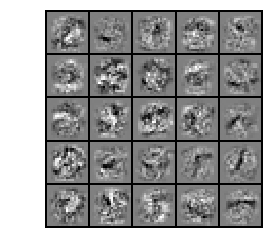

In [18]:
# ===================== Part 10: Visualize Weights =====================
# You can now 'visualize' what the neural network is learning by
# displaying the hidden units to see what features they are capturing in
# the data

print('Visualizing Neural Network...')

dd.display_data(theta1[:, 1:])

In [19]:
# ===================== Part 11: Implement Predict =====================
# After the training the neural network, we would like to use it to predict
# the labels. You will now implement the 'predict' function to use the
# neural network to predict the labels of the training set. This lets
# you compute the training set accuracy.

pred = pd.predict(theta1, theta2, X)

print('Training set accuracy: {}'.format(np.mean(pred == y)*100))

Training set accuracy: 99.56
